# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 11.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
84176,0.0024,0.0024,0.0586,0.0024,0.0024,0.0098,0.4419,0.0977,0.0146,0.1074,1,0,11,0
368543,0.0024,0.0024,0.0024,0.0024,0.0024,0.0342,0.4517,0.1587,0.0024,0.1904,5,0,14,0
255244,0.0146,0.0024,0.0024,0.0024,0.0024,0.0049,0.1050,0.0757,0.0024,0.0488,0,0,0,0
227402,0.0024,0.2905,4.1846,4.5801,0.3613,0.4541,1.4209,0.7300,4.3066,0.8643,1,1,16,16
221895,0.0366,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0146,0.0024,0.0024,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471954 entries, 0 to 471953
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471954 non-null  float64
 1   Emg2          471954 non-null  float64
 2   Emg3          471954 non-null  float64
 3   Emg4          471954 non-null  float64
 4   Emg5          471954 non-null  float64
 5   Emg6          471954 non-null  float64
 6   Emg7          471954 non-null  float64
 7   Emg8          471954 non-null  float64
 8   Emg9          471954 non-null  float64
 9   Emg10         471954 non-null  float64
 10  repetition    471954 non-null  int64  
 11  rerepetition  471954 non-null  int64  
 12  stimulus      471954 non-null  int64  
 13  restimulus    471954 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471954.000000,471954.000000,471954.000000,471954.000000,471954.000000,471954.000000,471954.000000,471954.000000,471954.000000,471954.000000,471954.00000,471954.000000,471954.000000,471954.000000
mean,0.013238,0.124466,0.208024,0.141833,0.015772,0.059688,0.636016,0.367091,0.206164,0.431468,3.12302,2.421774,5.533450,4.205899
std,0.020766,0.298463,0.377703,0.343489,0.043786,0.115154,0.753703,0.530722,0.399797,0.639627,3.47991,3.343693,6.566056,6.198330
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.112300,0.083000,0.002400,0.019500,0.00000,0.000000,0.000000,0.000000
50%,0.004900,0.002400,0.026900,0.002400,0.002400,0.022000,0.407700,0.173300,0.014600,0.207500,2.00000,0.000000,3.000000,0.000000
75%,0.014600,0.087900,0.271000,0.134300,0.004900,0.068400,0.869100,0.407700,0.258800,0.576200,6.00000,5.000000,10.000000,8.000000
max,0.439500,4.668000,4.660600,4.665500,1.008300,2.297400,4.668000,4.668000,4.663100,4.665500,10.00000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     204010
12     15511
2      15503
4      15497
7      15497
8      15487
5      15459
9      15459
6      15456
11     15450
1      15421
10     15415
3      15414
14     10334
17     10327
13     10324
15     10290
16     10246
21      5165
18      5161
19      5161
22      5125
20      5121
23      5121
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,1.361420,-0.435622,-0.576924,-0.429891,-0.279189,-0.016695,-0.650775,-0.707053,-0.542308,-0.664011
1,1.245828,-0.435622,-0.576924,-0.429891,-0.332237,-0.056496,-0.669103,-0.707053,-0.542308,-0.671213
2,1.009829,-0.435622,-0.576924,-0.429891,-0.332237,-0.096296,-0.656927,-0.702635,-0.542308,-0.671213
3,0.773830,-0.435622,-0.576924,-0.429891,-0.332237,-0.115790,-0.635460,-0.702635,-0.542308,-0.667686
4,0.537831,-0.435622,-0.576924,-0.429891,-0.332237,-0.016695,-0.592528,-0.698394,-0.542308,-0.667686
...,...,...,...,...,...,...,...,...,...,...
398478,-0.521757,-0.435622,-0.576924,-0.429891,-0.332237,-0.433382,-0.056248,-0.495547,-0.542308,-0.043327
398479,-0.521757,-0.435622,-0.576924,-0.429891,-0.332237,-0.413888,-0.111357,-0.512863,-0.542308,-0.089919
398480,-0.521757,-0.435622,-0.576924,-0.429891,-0.332237,-0.433382,-0.117509,-0.517104,-0.542308,-0.104322
398481,-0.521757,-0.435622,-0.576924,-0.429891,-0.332237,-0.374087,-0.059261,-0.491306,-0.542308,-0.064785


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
79/79 [==============================] - 3s 28ms/step - loss: 1.3664 - accuracy: 0.6287 - val_loss: 0.9454 - val_accuracy: 0.7230
Epoch 2/100
79/79 [==============================] - 2s 26ms/step - loss: 0.8500 - accuracy: 0.7476 - val_loss: 0.7597 - val_accuracy: 0.7729
Epoch 3/100
79/79 [==============================] - 2s 25ms/step - loss: 0.7118 - accuracy: 0.7848 - val_loss: 0.6909 - val_accuracy: 0.7911
Epoch 4/100
79/79 [==============================] - 2s 26ms/step - loss: 0.6367 - accuracy: 0.8051 - val_loss: 0.5899 - val_accuracy: 0.8172
Epoch 5/100
79/79 [==============================] - 2s 26ms/step - loss: 0.5819 - accuracy: 0.8201 - val_loss: 0.5657 - val_accuracy: 0.8246
Epoch 6/100
79/79 [==============================] - 2s 25ms/step - loss: 0.5460 - accuracy: 0.8305 - val_loss: 0.5184 - val_accuracy: 0.8371
Epoch 7/100
79/79 [==============================] - 2s 26ms/step - loss: 0.5096 - accuracy: 0.8394 - val_loss: 0.4876 - val_accuracy: 0.8444
Epoch 

79/79 [==============================] - 2s 25ms/step - loss: 0.1701 - accuracy: 0.9437 - val_loss: 0.2277 - val_accuracy: 0.9298
Epoch 59/100
79/79 [==============================] - 2s 25ms/step - loss: 0.1750 - accuracy: 0.9426 - val_loss: 0.2050 - val_accuracy: 0.9344
Epoch 60/100
79/79 [==============================] - 2s 25ms/step - loss: 0.1702 - accuracy: 0.9438 - val_loss: 0.1993 - val_accuracy: 0.9356
Epoch 61/100
79/79 [==============================] - 2s 25ms/step - loss: 0.1647 - accuracy: 0.9453 - val_loss: 0.2032 - val_accuracy: 0.9347
Epoch 62/100
79/79 [==============================] - 2s 25ms/step - loss: 0.1604 - accuracy: 0.9469 - val_loss: 0.2003 - val_accuracy: 0.9349
Epoch 63/100
79/79 [==============================] - 2s 25ms/step - loss: 0.1605 - accuracy: 0.9468 - val_loss: 0.1996 - val_accuracy: 0.9360
Epoch 64/100
79/79 [==============================] - 2s 25ms/step - loss: 0.1636 - accuracy: 0.9458 - val_loss: 0.1941 - val_accuracy: 0.9381
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

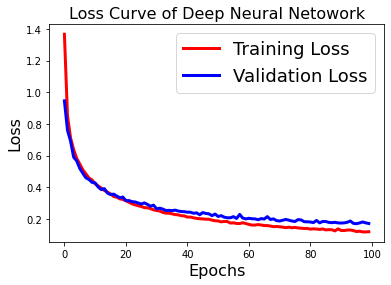

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

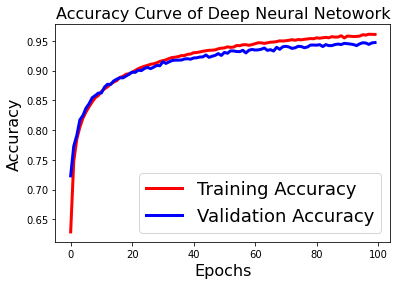

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([ 0,  0,  0, ...,  0, 17,  0], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

0

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 94.7262757694769


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     39628
           1       0.93      0.96      0.95      2491
           2       0.95      0.91      0.93      2634
           3       0.97      0.95      0.96      2229
           4       0.97      0.96      0.96      2256
           5       0.98      0.86      0.92      2081
           6       0.97      0.94      0.95      2297
           7       0.92      0.87      0.90      2369
           8       0.94      0.92      0.93      2312
           9       0.97      0.89      0.93      2453
          10       0.93      0.95      0.94      2114
          11       0.94      0.95      0.94      2359
          12       0.94      0.91      0.93      2139
          13       0.90      0.93      0.91      1545
          14       0.87      0.86      0.87      1498
          15       0.86      0.78      0.82      1513
          16       0.93      0.95      0.94      1601
 

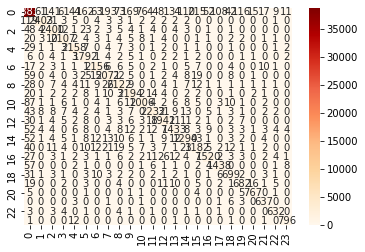

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.43813443416941666
MSE: 5.342032949797358
RMSE: 2.3112838315095265


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9471895518266209
Recall Score :  0.947262757694769
f1_score :  0.9468429657731943
